# WeatherPy Homework
----

#### Analysis
* The plotted data supports the assumption that temperature increases with proximity to the Equator (latitude = 0), while temperature decreases with distance away from the Equator. 
* Temperature appears to be the most significantly dependent variable related to latitutde (as compared to the other variables measured in relation to latitude)
* Both wind speed and cloudiness appear to lack a significant relationship with latitude. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from time import strftime
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

#### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [4]:
print("Beginning Data Retrieval")
print("-------------------------------")
record_num = 1

for city in cities:  
    try: 
        response = requests.get(url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name_if_found = response["name"]
        print(f"Processing Record {record_num} of Set 1 | {city_name_if_found}")
        record_num = record_num + 1
    except:
        print("City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Kiunga
Processing Record 2 of Set 1 | Rikitea
Processing Record 3 of Set 1 | Atuona
Processing Record 4 of Set 1 | Jamestown
Processing Record 5 of Set 1 | Xining
City not found. Skipping...
Processing Record 6 of Set 1 | Viedma
Processing Record 7 of Set 1 | Taraz
City not found. Skipping...
Processing Record 8 of Set 1 | Punta Arenas
City not found. Skipping...
Processing Record 9 of Set 1 | Ushuaia
Processing Record 10 of Set 1 | Saint-Philippe
Processing Record 11 of Set 1 | Georgetown
Processing Record 12 of Set 1 | Bluff
Processing Record 13 of Set 1 | Busselton
Processing Record 14 of Set 1 | Sao Joao da Barra
Processing Record 15 of Set 1 | Whitehorse
Processing Record 16 of Set 1 | Vega de Alatorre
Processing Record 17 of Set 1 | Turukhansk
Processing Record 18 of Set 1 | Avarua
Processing Record 19 of Set 1 | Erenhot
Processing Record 20 of Set 1 | Komsomolskiy
Processing Record 21 of Set 

Processing Record 179 of Set 1 | Kyzyl-Suu
Processing Record 180 of Set 1 | Flinders
City not found. Skipping...
City not found. Skipping...
Processing Record 181 of Set 1 | Ust-Kuyga
Processing Record 182 of Set 1 | Khatanga
Processing Record 183 of Set 1 | Umba
Processing Record 184 of Set 1 | Fort Morgan
City not found. Skipping...
Processing Record 185 of Set 1 | Chapais
Processing Record 186 of Set 1 | Smidovich
Processing Record 187 of Set 1 | Katsuura
Processing Record 188 of Set 1 | Mount Isa
Processing Record 189 of Set 1 | Hammerfest
Processing Record 190 of Set 1 | Ahipara
Processing Record 191 of Set 1 | Karimnagar
Processing Record 192 of Set 1 | Nantucket
Processing Record 193 of Set 1 | Xuddur
City not found. Skipping...
Processing Record 194 of Set 1 | Gusau
Processing Record 195 of Set 1 | Surt
Processing Record 196 of Set 1 | Porto Novo
Processing Record 197 of Set 1 | Vyyezdnoye
City not found. Skipping...
Processing Record 198 of Set 1 | Kuragino
Processing Record 1

Processing Record 357 of Set 1 | Mana
Processing Record 358 of Set 1 | Huambo
Processing Record 359 of Set 1 | Pingliang
Processing Record 360 of Set 1 | Belyy Yar
Processing Record 361 of Set 1 | Yar-Sale
Processing Record 362 of Set 1 | Grafton
Processing Record 363 of Set 1 | Ahuimanu
Processing Record 364 of Set 1 | Ulety
Processing Record 365 of Set 1 | Virginia Beach
Processing Record 366 of Set 1 | Florianopolis
Processing Record 367 of Set 1 | Lafia
Processing Record 368 of Set 1 | Guerrero Negro
Processing Record 369 of Set 1 | Naze
Processing Record 370 of Set 1 | Banswara
Processing Record 371 of Set 1 | Borodino
Processing Record 372 of Set 1 | Carballo
Processing Record 373 of Set 1 | Hami
Processing Record 374 of Set 1 | Laharpur
Processing Record 375 of Set 1 | Kpandae
Processing Record 376 of Set 1 | Henties Bay
Processing Record 377 of Set 1 | Touros
Processing Record 378 of Set 1 | Cockburn Town
Processing Record 379 of Set 1 | Moron
Processing Record 380 of Set 1 | J

#### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

In [6]:
weather_df.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [7]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kiunga,96,PG,1568179287,87,-6.12,141.30,75.65,2.35
1,Rikitea,46,PF,1568179287,79,-23.12,-134.97,70.79,15.26
2,Atuona,73,PF,1568179287,77,-9.80,-139.03,79.61,17.18
3,Jamestown,39,AU,1568179287,39,-33.21,138.60,69.53,9.51
4,Xining,48,CN,1568179287,49,36.62,101.77,73.99,5.93


In [8]:
weather_df.to_csv("weather_df.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
todays_date_unformatted = weather_df.Date.max()
todays_date_formatted = datetime.fromtimestamp(int(todays_date_unformatted)).strftime('%m/%d/%Y')

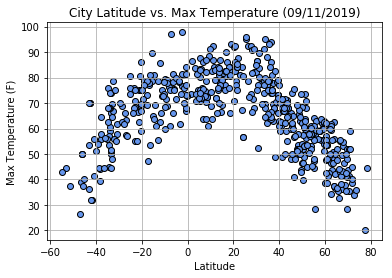

In [10]:
lat_temp = plt.scatter(lat, max_temp, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature (" + (todays_date_formatted) + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Images/Lat_vs_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

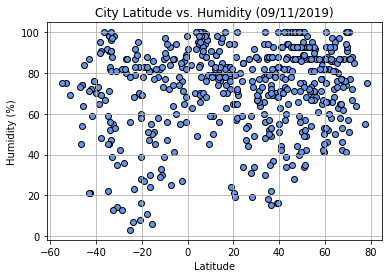

In [11]:
lat_humidity = plt.scatter(lat, humidity, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.title(f"City Latitude vs. Humidity (" + (todays_date_formatted) + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Images/Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

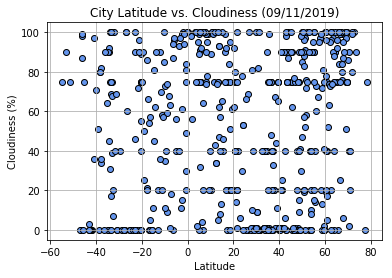

In [12]:
lat_cloudiness = plt.scatter(lat, cloudiness, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness (" + (todays_date_formatted) + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Images/Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

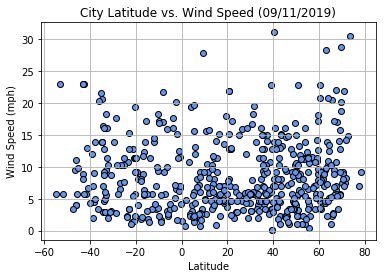

In [13]:
lat_wind_speed = plt.scatter(lat, wind_speed, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed (" + (todays_date_formatted) + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Images/Lat_vs_Wind.png")
plt.show()